# Atrial fibrillation detection dataset

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import afdetection.utils.paths as path
from afdetection.data.make_dataset import MakeDataset

sns.set_theme()

## Load PTB-XL dataset 

The file `coorteeqsrfava.csv` contains in the column 'ritmi' the following three diagnosis: 
- NORMAL (labeled as SR from ssinus rhythm),
- ATRIAL FIBRILLATION (label AF) and; 
- VARIOUS Arrhytmias summed up into one class only (labeled VA). 

The Numpy file consists of 12-leads electrocardiograms (ECG) of the 6428 patients in the `coorteeqsrfava.csv` file.

The classes are composed on the rhythm diagnosis from PTB-XL:
- SR 16782 sinus rhythm
- AFIB 1514 atrial fibrillation
- STACH 826 sinus tachycardia
- SARRH 772 sinus arrhythmia
- SBRAD 637 sinus bradycardia
- PACE 296 normal functioning artificial pacemaker
- SVARR 157 supraventricular arrhythmia
- BIGU 82 bigeminal pattern (unknown origin, SV or Ventricular)
- AFLT 73 atrial flutter
- SVTAC 27 supraventricular tachycardia
- PSVT 24 paroxysmal supraventricular tachycardia
- TRIGU 20 trigeminal pattern (unknown origin, SV or Ventricular)

Only 2000 records are taken from SR in order to build a more balanced datasets, they are sampled without repetition. AF is composed by AFIB and AFLT 1587 records. VA are all other types of arrhythmias summed up into one big class.

In [3]:
make_data = MakeDataset()
tab_data_DIR = path.data_raw_dir('coorteeqsrafva.csv')
metadata = make_data.read_from_csv(tab_data_DIR)
print('shape: {}'.format(metadata.shape))
print(metadata.columns)
display(metadata.head())
display(metadata.describe().T)
print('='*10)
print(metadata['ritmi'].value_counts(dropna=False))
print('='*10)
print(metadata['diagnosi'].value_counts(dropna=False))

shape: (6428, 30)
Index(['diagnosi', 'ecg_id', 'ritmi', 'patient_id', 'age', 'sex', 'height',
       'weight', 'nurse', 'site', 'device', 'recording_date', 'report',
       'scp_codes', 'heart_axis', 'infarction_stadium1', 'infarction_stadium2',
       'validated_by', 'second_opinion', 'initial_autogenerated_report',
       'validated_by_human', 'baseline_drift', 'static_noise', 'burst_noise',
       'electrodes_problems', 'extra_beats', 'pacemaker', 'strat_fold',
       'filename_lr', 'filename_hr'],
      dtype='object')


,diagnosi,ecg_id,ritmi,patient_id,age,sex,height,weight,nurse,site,...,validated_by_human,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr
0,STACH,10900,VA,15654.0,54.0,0,NaN,NaN,0.0,0.0,...,False,NaN,NaN,NaN,NaN,NaN,NaN,6,records100/10000/10900_lr,records500/10000/10900_hr
1,AFLT,10900,AF,15654.0,54.0,0,NaN,NaN,0.0,0.0,...,False,NaN,NaN,NaN,NaN,NaN,NaN,6,records100/10000/10900_lr,records500/10000/10900_hr
2,SR,8209,SR,12281.0,55.0,0,NaN,NaN,1.0,2.0,...,True,NaN,NaN,NaN,NaN,NaN,NaN,10,records100/08000/08209_lr,records500/08000/08209_hr
3,STACH,17620,VA,2007.0,29.0,1,164.0,56.0,7.0,1.0,...,True,NaN,NaN,NaN,NaN,NaN,NaN,1,records100/17000/17620_lr,records500/17000/17620_hr
4,SBRAD,12967,VA,8685.0,57.0,0,NaN,NaN,0.0,0.0,...,False,NaN,", I-AVR,",NaN,NaN,NaN,NaN,1,records100/12000/12967_lr,records500/12000/12967_hr


,count,mean,std,min,25%,50%,75%,max
ecg_id,6428.0,11394.336341,6239.520460,2.0,6112.25,11550.5,16785.5,21833.0
patient_id,6428.0,11597.602520,6248.076594,304.0,6489.25,11976.0,16958.0,21792.0
age,6394.0,61.740069,17.739252,4.0,52.00,64.0,75.0,95.0
sex,6428.0,0.478376,0.499571,0.0,0.00,0.0,1.0,1.0
height,1866.0,166.796356,10.249504,95.0,160.00,167.0,174.0,195.0
weight,2428.0,69.841845,16.795521,5.0,58.00,69.0,79.0,210.0
nurse,6097.0,2.093817,3.124924,0.0,0.00,1.0,2.0,11.0
site,6423.0,1.478281,3.891928,0.0,0.00,1.0,2.0,49.0
validated_by,3676.0,0.753536,1.075984,0.0,0.00,1.0,1.0,10.0
strat_fold,6428.0,5.525047,2.871204,1.0,3.00,6.0,8.0,10.0


VA    2841
SR    2000
AF    1587
Name: ritmi, dtype: int64
SR       2000
AFIB     1514
STACH     826
SARRH     772
SBRAD     637
PACE      296
SVARR     157
BIGU       82
AFLT       73
SVTAC      27
PSVT       24
TRIGU      20
Name: diagnosi, dtype: int64


## Metadata

Columns provided in the metadata table. Each ECG is identified by a unique ID (ecg_id) and comes with a number of ECG statements(scp_codes) that can be used to train a multi-label classifier that can be evaluated based on the proposed fold assignment (strat_fold).

In [4]:
identifiers = [
    'ecg_id', 
    'patient_id',
    'filename_lr', 
    'filename_hr',
]

general_metadata = [
    'age', 
    'sex', 
    'height',
    'weight', 
    'nurse', 
    'site', 
    'device', 
    'recording_date',
]

ecg_statements = [
    'report',
    'scp_codes', 
    'heart_axis', 
    'infarction_stadium1', 
    'infarction_stadium2',
    'validated_by', 
    'second_opinion', 
    'initial_autogenerated_report',
    'validated_by_human',
]

signal_metadata = [
    'baseline_drift', 
    'static_noise', 
    'burst_noise',
    'electrodes_problems', 
    'extra_beats', 
    'pacemaker'
]

cros_val_folds = ['strat_fold']

diagnostic = [
    'diagnosi',
    'ritmi'
]

In [5]:
display(metadata[identifiers].head())
display(metadata[general_metadata].head())
display(metadata[ecg_statements].head())
display(metadata[signal_metadata].head())
display(metadata[cros_val_folds].head())
display(metadata[diagnostic].head())

,ecg_id,patient_id,filename_lr,filename_hr
0,10900,15654.0,records100/10000/10900_lr,records500/10000/10900_hr
1,10900,15654.0,records100/10000/10900_lr,records500/10000/10900_hr
2,8209,12281.0,records100/08000/08209_lr,records500/08000/08209_hr
3,17620,2007.0,records100/17000/17620_lr,records500/17000/17620_hr
4,12967,8685.0,records100/12000/12967_lr,records500/12000/12967_hr


,age,sex,height,weight,nurse,site,device,recording_date
0,54.0,0,NaN,NaN,0.0,0.0,CS100 3,1993-09-01 11:31:17
1,54.0,0,NaN,NaN,0.0,0.0,CS100 3,1993-09-01 11:31:17
2,55.0,0,NaN,NaN,1.0,2.0,CS-12,1992-06-09 15:52:36
3,29.0,1,164.0,56.0,7.0,1.0,AT-6 C 5.6,1997-02-08 18:33:30
4,57.0,0,NaN,NaN,0.0,0.0,CS100 3,1994-09-13 10:21:14


,report,scp_codes,heart_axis,infarction_stadium1,infarction_stadium2,validated_by,second_opinion,initial_autogenerated_report,validated_by_human
0,"sinustachykardie wpw, typ a lagetyp normal 4.4...","{'AFLT': 100.0, 'STACH': 0.0}",MID,NaN,NaN,NaN,False,True,False
1,"sinustachykardie wpw, typ a lagetyp normal 4.4...","{'AFLT': 100.0, 'STACH': 0.0}",MID,NaN,NaN,NaN,False,True,False
2,sinusrhythmus linkslagetyp intraventr. leitung...,"{'LVH': 100.0, 'ISC_': 100.0, 'SR': 0.0}",LAD,NaN,NaN,1.0,False,False,True
3,sinus tachycardia. otherwise normal ecg.,"{'NORM': 80.0, 'STACH': 0.0}",NaN,NaN,NaN,0.0,False,False,True
4,sinusbradykardie lagetyp normal sonst normales...,"{'NORM': 80.0, 'SBRAD': 0.0}",MID,NaN,NaN,NaN,False,True,False


,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,", I-AVR,",NaN,NaN,NaN,NaN


,strat_fold
0,6
1,6
2,10
3,1
4,1


,diagnosi,ritmi
0,STACH,VA
1,AFLT,AF
2,SR,SR
3,STACH,VA
4,SBRAD,VA


### Metadata exploration

- Which gender usually has a higher risk of getting AF? (0 is male, 1 is female)

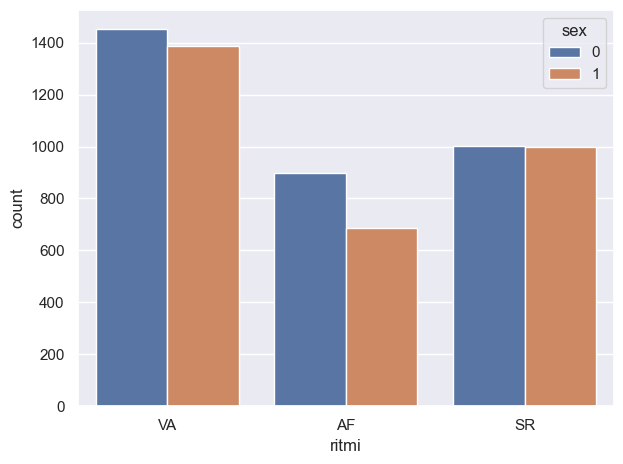

In [6]:
sns.countplot(data=metadata, x='ritmi', hue='sex')
plt.tight_layout()
plt.show()

- Which ages are associated with higher risk of having AF than others?

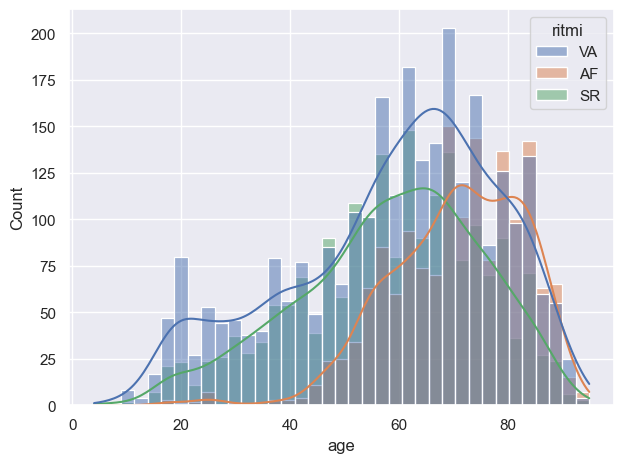

In [7]:
sns.histplot(data=metadata, x='age', hue='ritmi', kde=True)
plt.tight_layout()
plt.show()

- What is the common weight of patients who have AF?

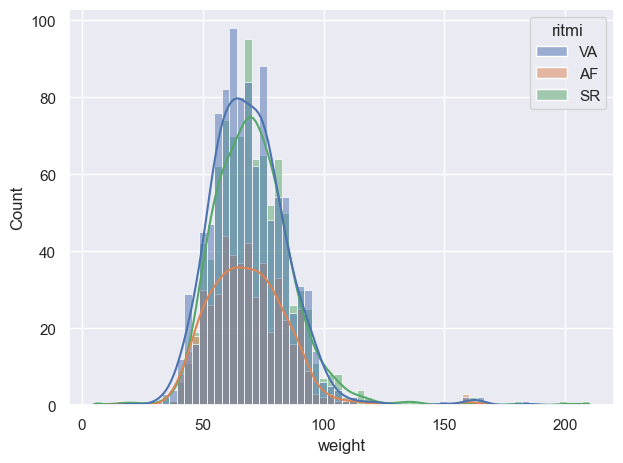

In [8]:
sns.histplot(data=metadata, x='weight', hue='ritmi', kde=True)
plt.tight_layout()
plt.show()

- What is the common height of patients who have AF?

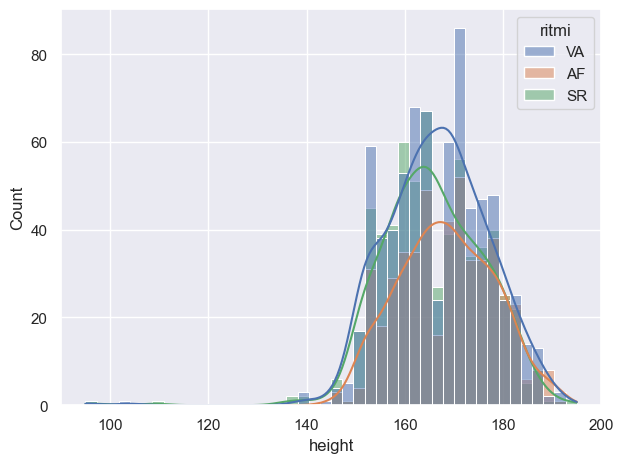

In [9]:
sns.histplot(data=metadata, x='height', hue='ritmi', kde=True)
plt.tight_layout()
plt.show()

## ECG data

This is an array, which contains 6428 layers, 5000 rows, and 12 columns. 12 columns represent for 12 leads, which are: 
- I,
- II, 
- III, 
- aVF, 
- aVR, 
- aVL, 
- V1, 
- V2, 
- V3, 
- V4, 
- V5, 
- V6. 

Leads I, II, III, aVR, aVL, aVF are denoted the limb leads while the V1, V2, V3, V4, V5, and V6 are precordial leads.

In [10]:
ecg_data_DIR = path.data_raw_dir('ecgeq-500hzsrfava.npy')
ecg = make_data.read_from_np(ecg_data_DIR)
m, n, lead = ecg.shape
print('shape: {}'.format(ecg.shape))

shape: (6428, 5000, 12)


In [11]:
leads = [
    'I',
    'II', 
    'III', 
    'aVF', 
    'aVR', 
    'aVL', 
    'V1', 
    'V2', 
    'V3', 
    'V4', 
    'V5', 
    'V6', 
]

### ECG visualization

In [12]:
sr_filt = (metadata['ritmi']=='SR')
va_filt = (metadata['ritmi']=='VA')
af_filt = (metadata['ritmi']=='AF')

#### Normal ECG

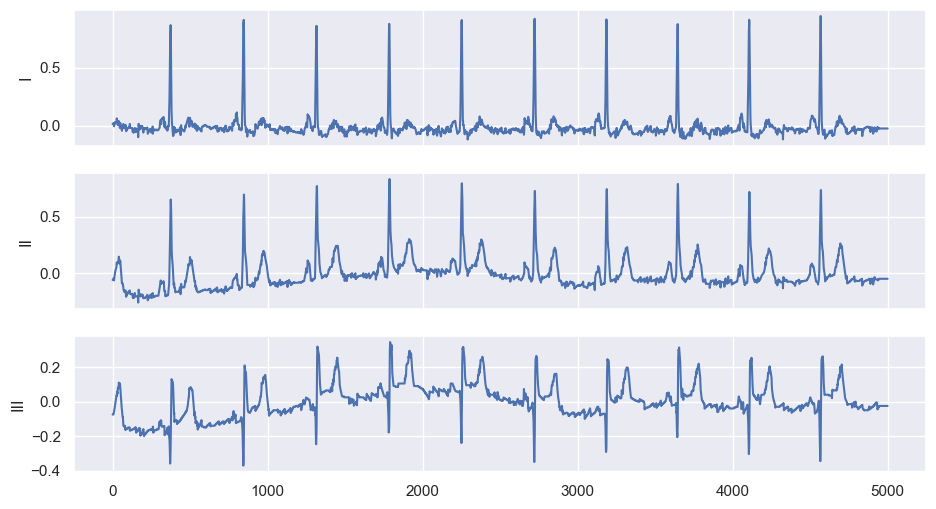

In [13]:
sr_sample = metadata[sr_filt].sample()

fig, ax = plt.subplots(3, 1, figsize=(11, 6), sharex=True, sharey=False)
for i in range(3):
    ax[i].plot(ecg[sr_sample.index, :, i].ravel())
    ax[i].set_ylabel(leads[i])
plt.tight_layout()
plt.show()

#### AF ECG

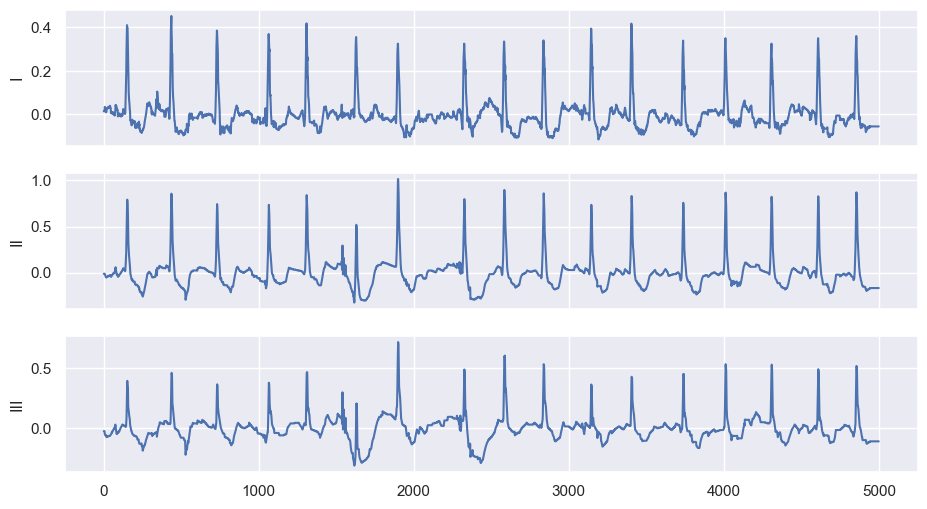

In [14]:
af_sample = metadata[af_filt].sample()

fig, ax = plt.subplots(3, 1, figsize=(11, 6), sharex=True, sharey=False)
for i in range(3):
    ax[i].plot(ecg[af_sample.index, :, i].ravel())
    ax[i].set_ylabel(leads[i])
plt.tight_layout()
plt.show()

#### VA ECG

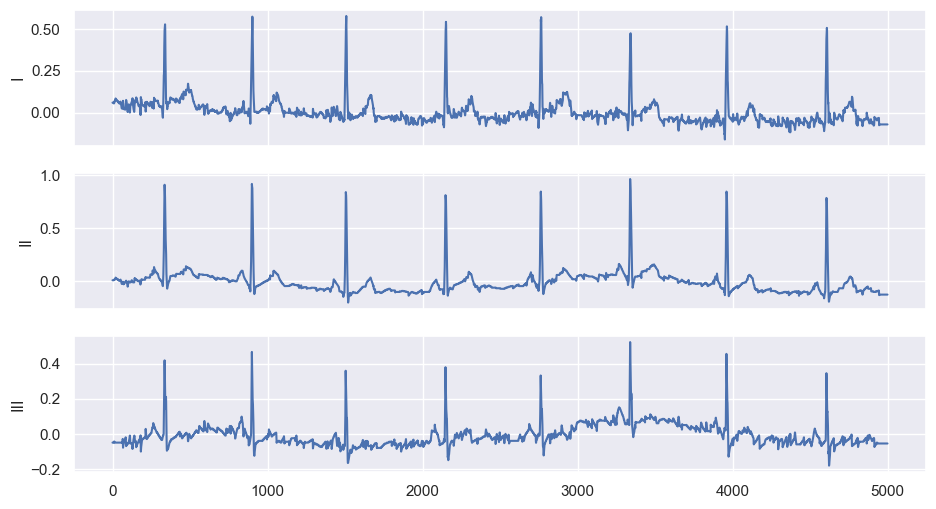

In [15]:
va_sample = metadata[va_filt].sample()

fig, ax = plt.subplots(3, 1, figsize=(11, 6), sharex=True, sharey=False)
for i in range(3):
    ax[i].plot(ecg[va_sample.index, :, i].ravel())
    ax[i].set_ylabel(leads[i])
plt.tight_layout()
plt.show()